# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [46]:
# Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#### We are trying to predict where a possum lives. In our dataset, the `pop` column either lists `Vic` or `other`, with `Vic` short for Victoria. Our goal is to make a classification model that will predict whether a possum lives in Victoria or somewhere else.

### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [4]:
df = pd.read_csv(r'C:\Users\nargi\Documents\coding temple\week 4\python day 4\classification-practice-main\data\possum.csv')

In [7]:
df.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [9]:
#How much data do I have?
df.shape

(104, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     104 non-null    int64  
 1   pop      104 non-null    object 
 2   sex      104 non-null    object 
 3   age      102 non-null    float64
 4   head_l   104 non-null    float64
 5   skull_w  104 non-null    float64
 6   total_l  104 non-null    float64
 7   tail_l   104 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ KB


In [23]:
#Baseline Score
#For regression - This is our model's performance if I guessed the mean  each time.
#R2, mean_squared_error, mean_absolute_error

df['pop'].value_counts(normalize=True)

#My basline accuracy is 55.8%. If I had a model predict 'other' each time, it would be right
#55.8% of the time. THIS is our goal to beat!

pop
other    0.557692
Vic      0.442308
Name: proportion, dtype: float64

### Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [13]:
df['pop'] #not df.pop

0        Vic
1        Vic
2        Vic
3        Vic
4        Vic
       ...  
99     other
100    other
101    other
102    other
103    other
Name: pop, Length: 104, dtype: object

In [20]:
mean_value = df['age'].mean()
mean_value

3.8333333333333335

In [21]:
#Deal with the missing values
df['age'].fillna(mean_value, inplace=True)
         #fill nulls

In [22]:
#No null values
df.isnull().sum()

site       0
pop        0
sex        0
age        0
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [24]:
df.dtypes

site         int64
pop         object
sex         object
age        float64
head_l     float64
skull_w    float64
total_l    float64
tail_l     float64
dtype: object

In [25]:
df.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [31]:
df['sex'].map({'m': 1, 'f':0})

0      1
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    0
102    1
103    0
Name: sex, Length: 104, dtype: int64

In [32]:
#convert sex m/f to 1/10
df['sex'].map({'m': 1, 'f':0})
df.drop(columns = 'sex', inplace = True)
df.head()

,site,pop,age,head_l,skull_w,total_l,tail_l,sex_m
0,1,Vic,8.0,94.1,60.4,89.0,36.0,1
1,1,Vic,6.0,92.5,57.6,91.5,36.5,0
2,1,Vic,6.0,94.0,60.0,95.5,39.0,0
3,1,Vic,6.0,93.2,57.1,92.0,38.0,0
4,1,Vic,2.0,91.5,56.3,85.5,36.0,0


In [33]:
import seaborn as sns

In [35]:
df['pop'] = df['pop'].map({'Vic': 1, 'other': 0})

In [34]:
df.corr(numeric_only=True)

,site,age,head_l,skull_w,total_l,tail_l,sex_m
site,1.000000,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,0.232817
age,-0.130799,1.000000,0.311848,0.279955,0.250970,0.117274,-0.063995
head_l,-0.163646,0.311848,1.000000,0.710827,0.691094,0.287429,0.107200
skull_w,-0.083548,0.279955,0.710827,1.000000,0.526413,0.255921,0.080014
total_l,-0.260843,0.250970,0.691094,0.526413,1.000000,0.565646,-0.160200
tail_l,0.380444,0.117274,0.287429,0.255921,0.565646,1.000000,-0.040917
sex_m,0.232817,-0.063995,0.107200,0.080014,-0.160200,-0.040917,1.000000


<Axes: xlabel='age', ylabel='tail_l'>

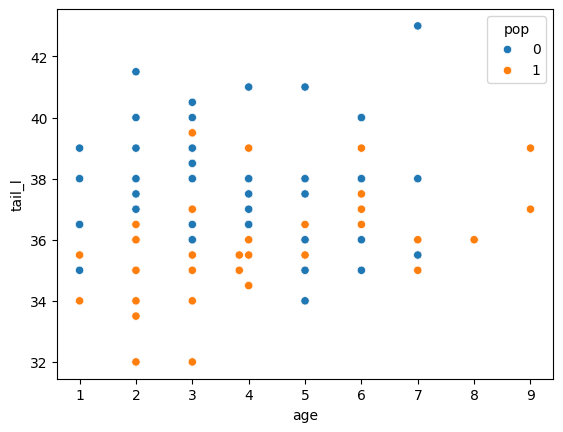

In [38]:
sns.scatterplot(x = df['age'], y = df['tail_l'], hue = df['pop'])

c:\Users\nargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\nargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

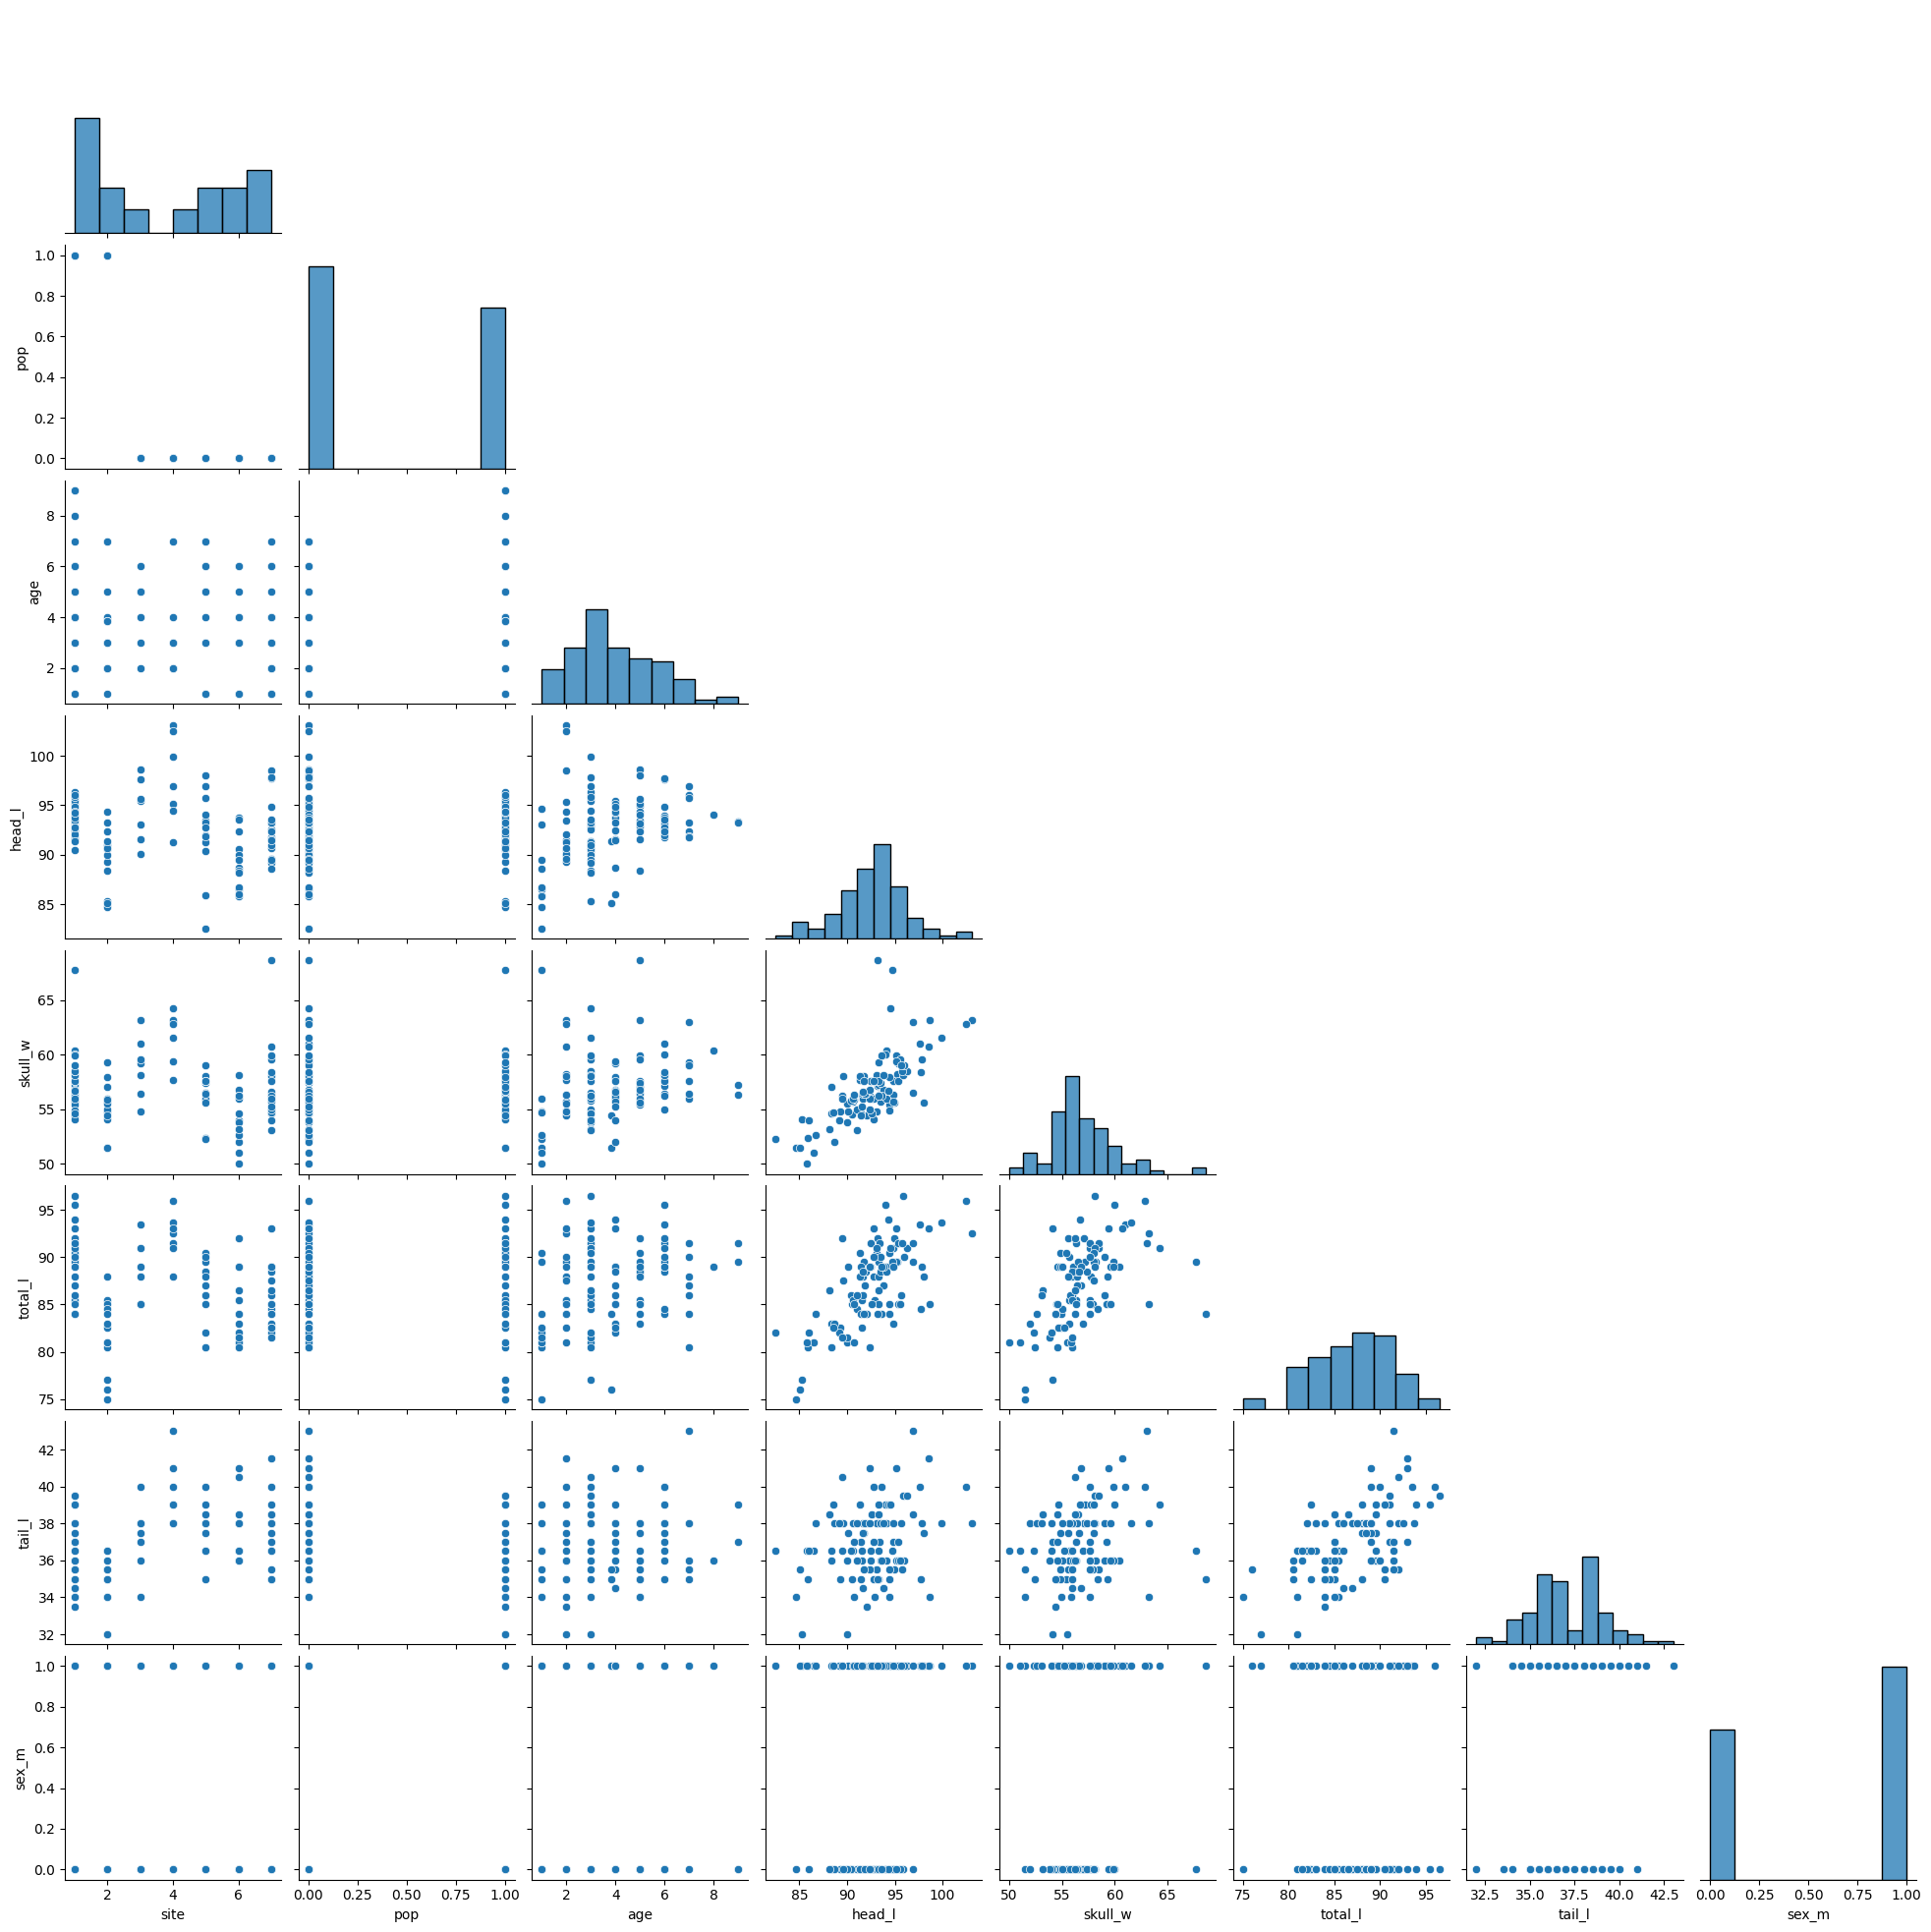

In [43]:
sns.pairplot(df, corner = True, palette = df['pop'])

<Axes: >

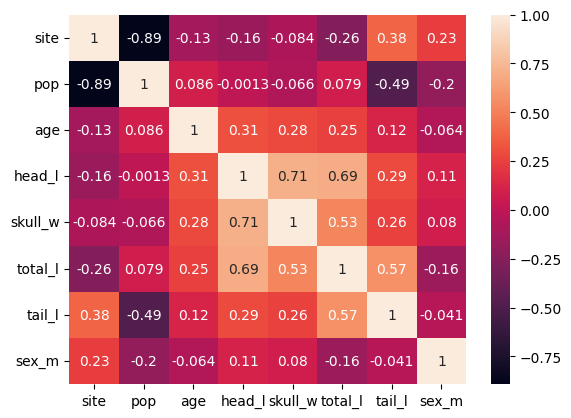

In [41]:
sns.heatmap(df.corr(), annot = True)

### Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

In [45]:
#Set up X and y
X = df.drop(columns='pop')
y = df['pop']

In [47]:
#Train test split!
#Note: We do this to preserve data to evaluate our model on unseen data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
print(y.value_counts(normalize=True))
print('---')
print(y_train.value_counts(normalize=True))
print('---')
print(y_test.value_counts(normalize=True))

pop
0    0.557692
1    0.442308
Name: proportion, dtype: float64
---
pop
0    0.564103
1    0.435897
Name: proportion, dtype: float64
---
pop
0    0.538462
1    0.461538
Name: proportion, dtype: float64


In [51]:
logreg = LogisticRegression(random_state=42, solver = 'liblinear')

In [52]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [53]:
logreg.score(X_train, y_train)

1.0

In [54]:
#This is what I care ab: how well dit it perform on unseen data
logreg.score(X_test, y_test)

0.9615384615384616

### Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.

In [55]:
X_test

,site,age,head_l,skull_w,total_l,tail_l,sex_m
30,1,3.000000,92.8,54.1,93.0,37.0,1
65,5,3.000000,90.4,55.8,86.0,36.5,0
64,5,5.000000,93.5,57.4,88.5,38.0,0
53,4,7.000000,96.9,63.0,91.5,43.0,1
45,2,3.833333,91.4,54.4,84.0,35.0,1
93,7,7.000000,91.8,57.6,84.0,35.5,1
91,7,2.000000,90.7,56.3,85.0,37.0,1
47,3,5.000000,98.6,63.2,85.0,34.0,1
10,1,9.000000,93.3,57.2,89.5,39.0,0
0,1,8.000000,94.1,60.4,89.0,36.0,1
